<h1 align='center' style='color:blue'>Project Title: Development of Credit Risk Model for Lauki Finance</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/diguinafils/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
bureau = pd.read_csv("dataset/bureau_data.csv")
customers = pd.read_csv("dataset/customers.csv")
loans = pd.read_csv("dataset/loans.csv")

## Creation of DataFrame

In [3]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df_merge = pd.merge(customers, bureau, on="cust_id")
df_merge.shape

(50000, 19)

In [4]:
df = pd.merge(df_merge, loans, on="cust_id")

In [5]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,"49,340.00",444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,"77,660.00",698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,"43,400.00",390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,"34,940.00",314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,"90,400.00",813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split


X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train.shape, df_test.shape

((35000, 33), (15000, 33))

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 35147 to 25974
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      35000 non-null  object 
 1   age                          35000 non-null  int64  
 2   gender                       35000 non-null  object 
 3   marital_status               35000 non-null  object 
 4   employment_status            35000 non-null  object 
 5   income                       35000 non-null  int64  
 6   number_of_dependants         35000 non-null  int64  
 7   residence_type               34956 non-null  object 
 8   years_at_current_address     35000 non-null  int64  
 9   city                         35000 non-null  object 
 10  state                        35000 non-null  object 
 11  zipcode                      35000 non-null  int64  
 12  number_of_open_accounts      35000 non-null  int64  
 13  number_of_closed_

In [9]:
df_train['default'] = df_train['default'].astype('int')
df_test['default'] = df_test['default'].astype('int')
df_train['default'].value_counts()

default
0    31992
1     3008
Name: count, dtype: int64

In [10]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 44
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_a

In [11]:
df_train['residence_type'].unique()

array(['Owned', 'Rented', 'Mortgage', nan], dtype=object)

In [12]:
mode = df_train['residence_type'].mode()[0]
df_train['residence_type'] = df_train['residence_type'].fillna(mode)

# for df_test
df_test['residence_type'] = df_test['residence_type'].fillna(mode)

df_train['residence_type'].unique()

array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [13]:
# continuous feature and categorical feature

continuous_columns = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application', 'default']

categorical_columns = ['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt']


### EDA of Numeric Colomns

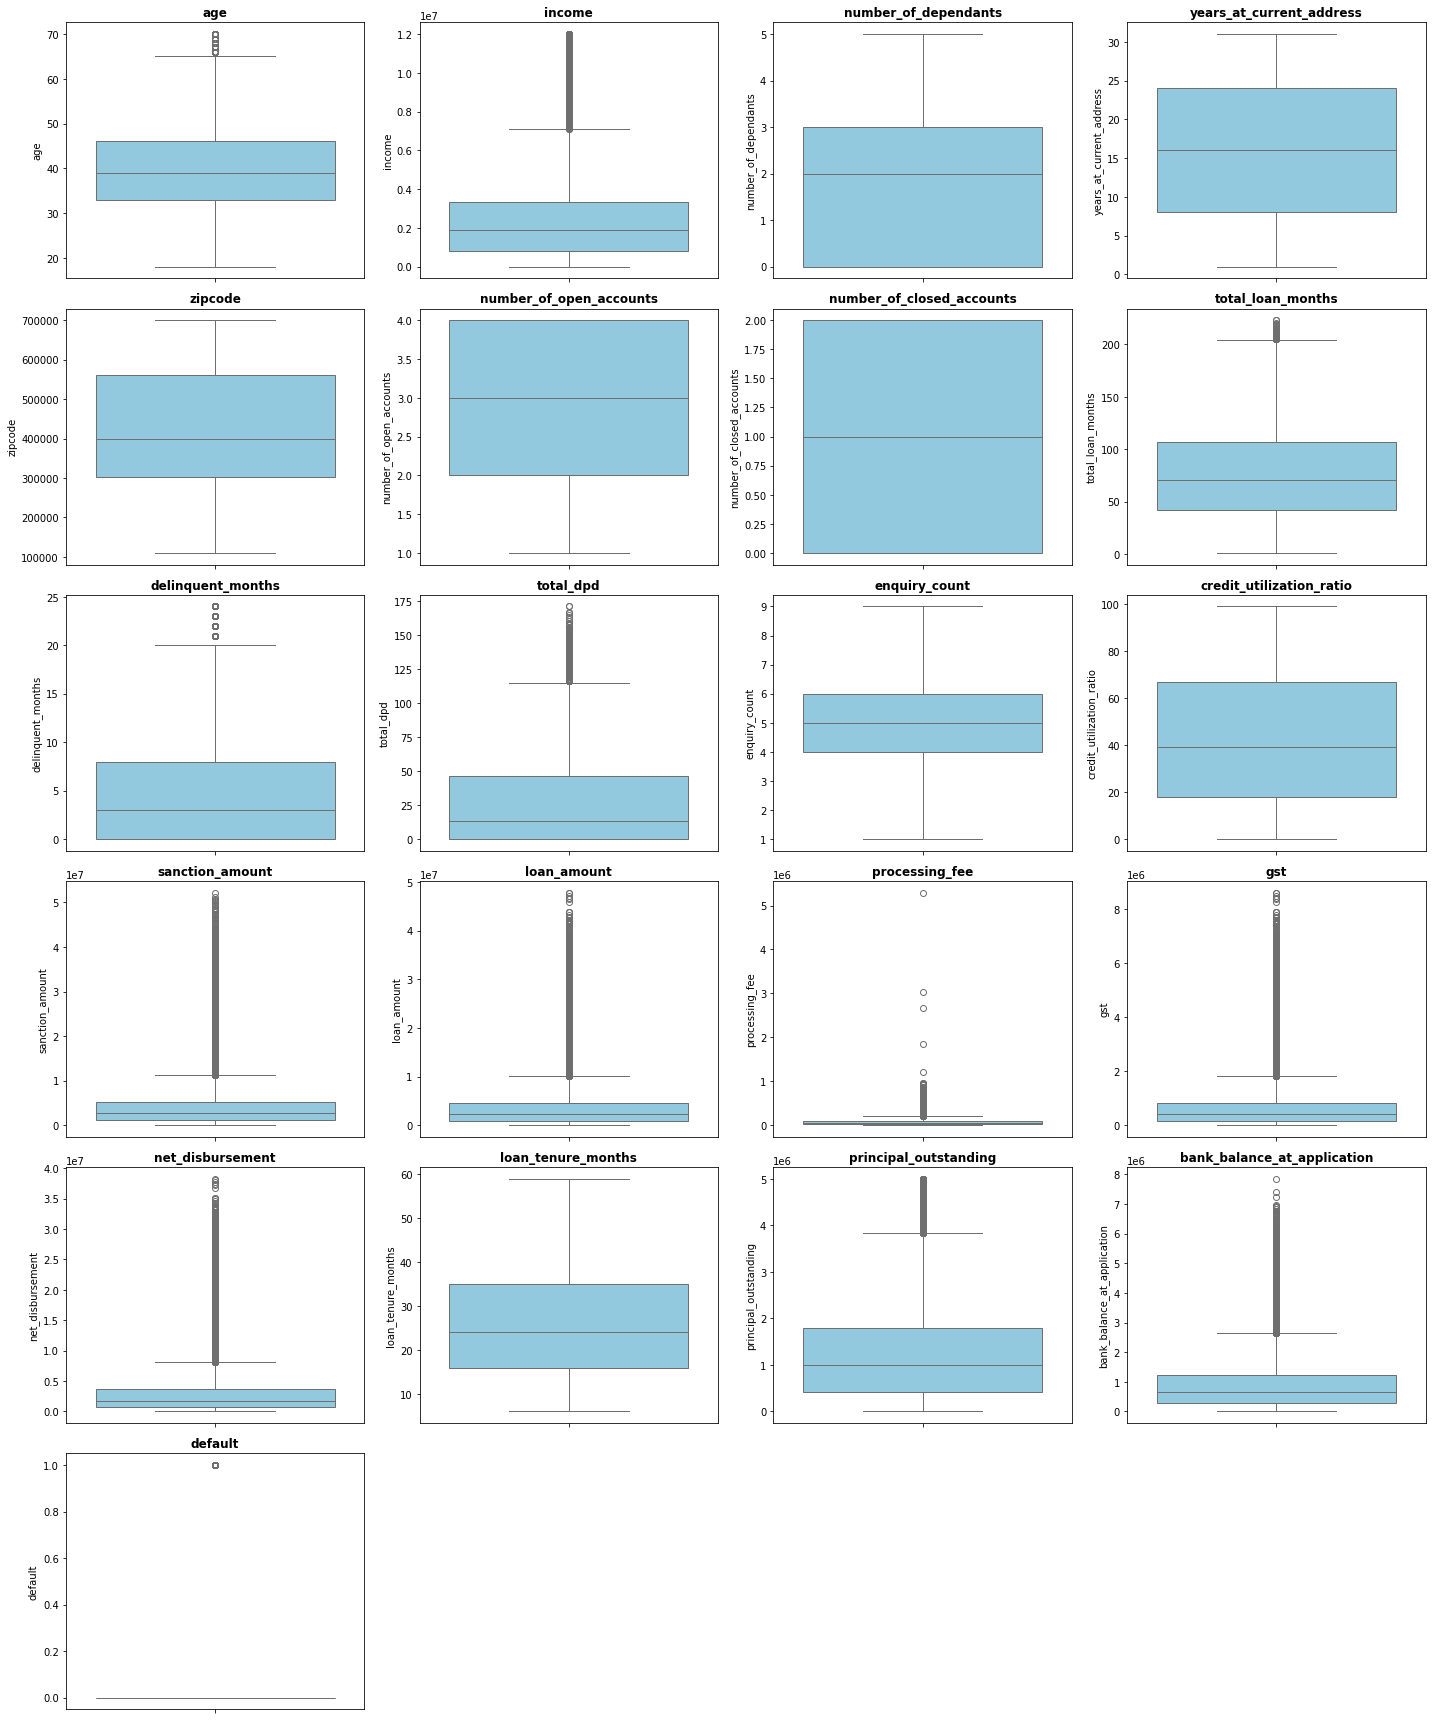

In [14]:
### Boxplot


# Number of continuous columns
n_cols = 4  # number of plots per row
n_rows = -(-len(continuous_columns) // n_cols)  # ceiling division

plt.figure(figsize=(n_cols*5, n_rows*4))  # adjust figure size

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_train[col], color="skyblue")
    plt.title(col, fontsize=12, fontweight="bold")
    plt.xlabel("")  # remove x-axis label for cleaner look

plt.tight_layout()
plt.show()



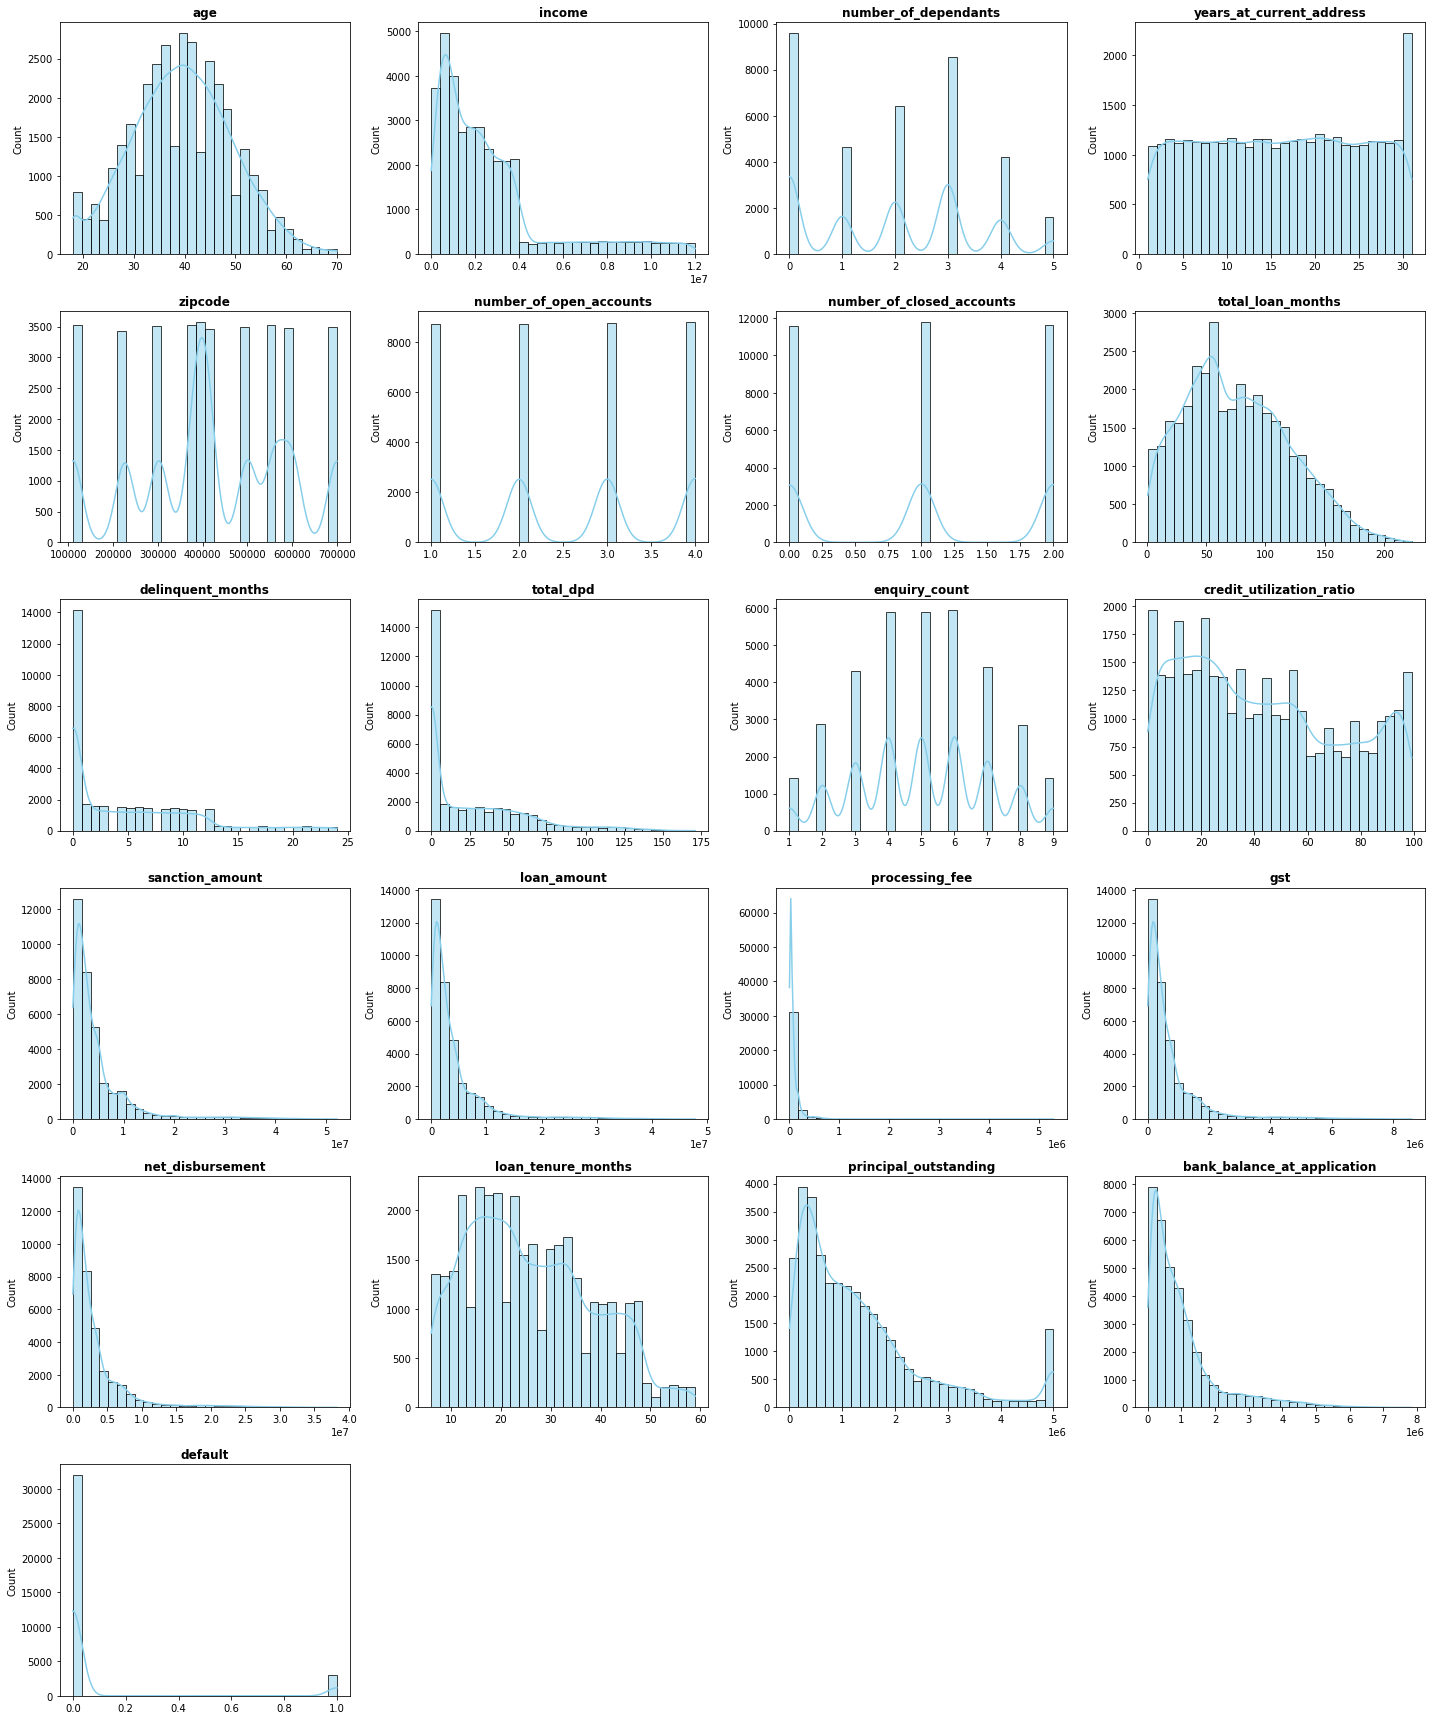

In [15]:
#histogramm

# Number of continuous columns
n_cols = 4  # number of plots per row
n_rows = -(-len(continuous_columns) // n_cols)  # ceiling division

plt.figure(figsize=(n_cols*5, n_rows*4))  # adjust figure size

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_train[col], bins=30, kde=True, color="skyblue")
    plt.title(col, fontsize=12, fontweight="bold")
    plt.xlabel("")  # optional: remove x-axis label for cleaner look
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [16]:
continuous_columns

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'default']

In [17]:
df_train['processing_fee'].describe()

count      35,000.00
mean       80,487.91
std       113,750.07
min             0.00
25%        19,260.00
50%        44,690.00
75%        92,580.00
max     5,293,543.52
Name: processing_fee, dtype: float64

In [18]:
df_train[(df_train['processing_fee']/df_train['loan_amount']) > 0.03][['processing_fee', 'loan_amount']]

,processing_fee,loan_amount
23981,"2,669,791.02",2234000
28174,"1,214,492.67",966000
47089,"1,858,964.77",1738000
29305,"3,036,378.01",2616000
9898,"5,293,543.52",3626000


In [19]:
### Handeling Outlier:

df_train_1 = df_train[(df_train['processing_fee']/df_train['loan_amount']) < 0.03].copy()
df_test = df_test[(df_test['processing_fee']/df_test['loan_amount']) < 0.03].copy()

df_train_1.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
35147,C35148,53,F,Married,Self-Employed,109000,4,Owned,21,Mumbai,...,126000,"2,520.00",22680,100800,26,72602,33654,2023-01-27,2023-01-28,0
15711,C15712,45,F,Single,Self-Employed,2513000,1,Owned,3,Mumbai,...,7562000,"151,240.00",1361160,6049600,25,1414985,616518,2021-02-17,2021-03-19,1
5304,C05305,37,M,Single,Self-Employed,11589000,1,Rented,29,Kolkata,...,4252000,"85,040.00",765360,3401600,16,3061439,1641032,2020-02-03,2020-02-26,0


In [20]:
df_train_1.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,"31,981.00",39.74,9.88,18.00,33.00,40.00,46.00,70.00
1,"3,008.00",37.19,9.34,18.00,31.00,37.00,44.00,70.00


Insights

1 - Average age in the default group is little less (37.12) than the average (39.7) of the group that did not default

2 - Variability (standard deviation) is mostly similar in both the groups

3 - Both the groups have similar min and max ages

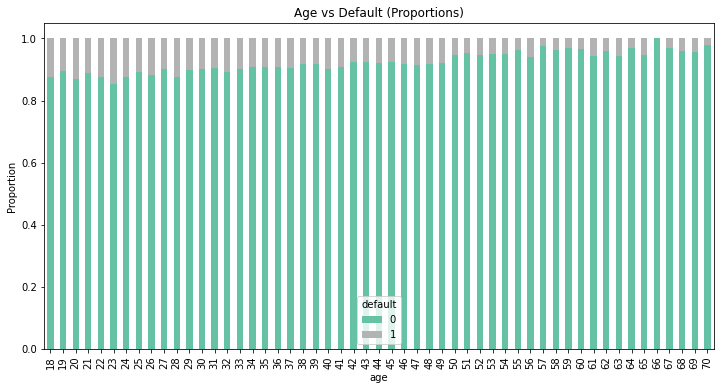

In [21]:
crosstab_norm = pd.crosstab(df_train_1['age'], df_train_1['default'], normalize='index')
crosstab_norm.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Age vs Default (Proportions)")
plt.ylabel("Proportion")
plt.show()

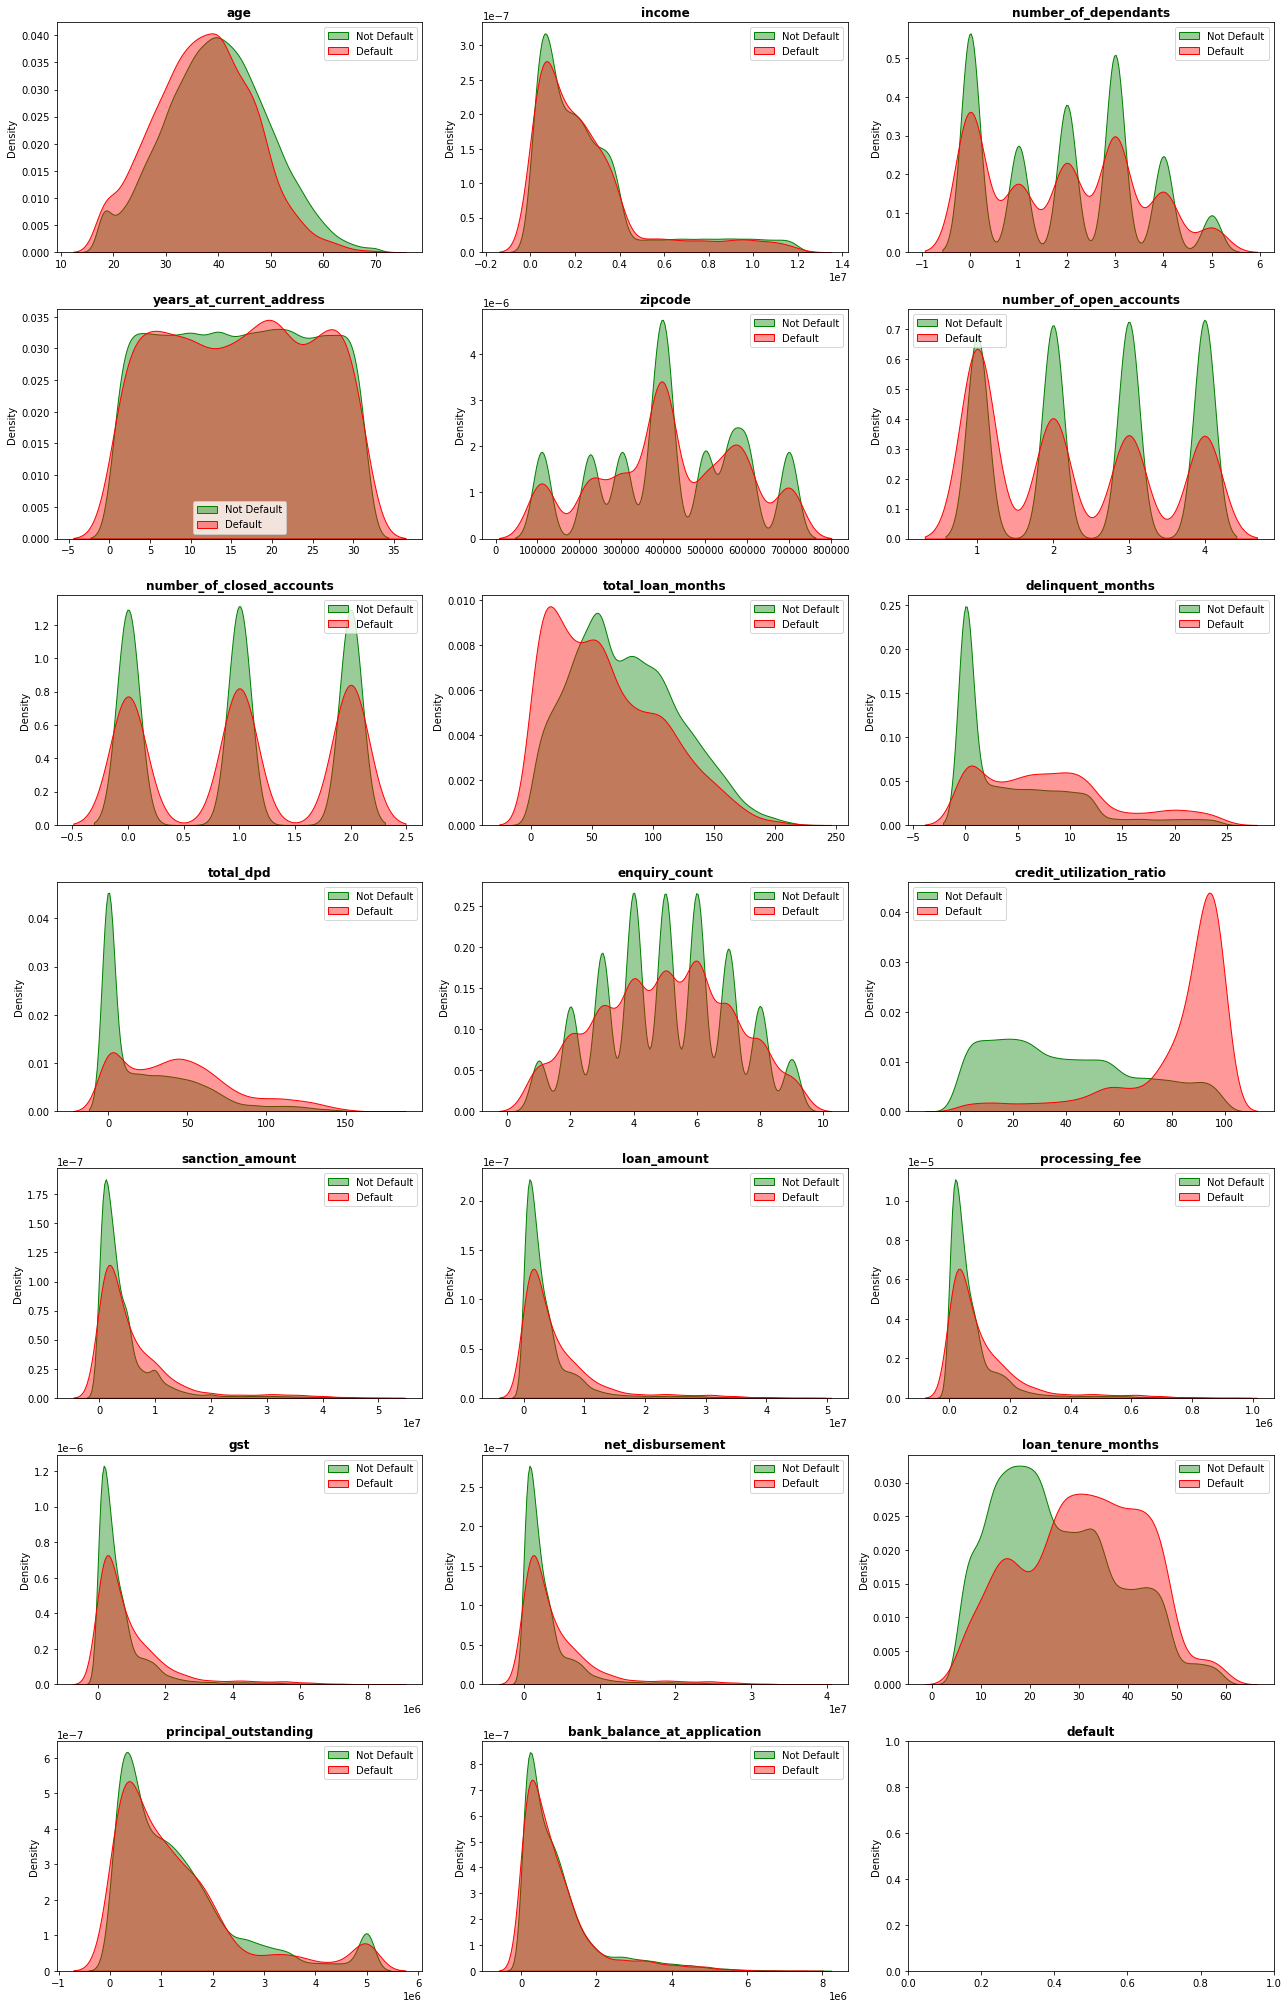

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3  
n_rows = -(-len(continuous_columns) // n_cols)  # ceiling division

plt.figure(figsize=(n_cols*6, n_rows*4))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    plotted = False  # track if something was plotted

    for status, color, label in [(0, "green", "Not Default"), (1, "red", "Default")]:
        data = df_train_1.loc[df_train_1['default'] == status, col].dropna()
        if data.nunique() > 1:  # only plot if variance > 0
            sns.kdeplot(data, fill=True, label=label, color=color, alpha=0.4)
            plotted = True

    plt.title(col, fontsize=12, fontweight="bold")
    plt.xlabel("")
    plt.ylabel("Density")

    if plotted:
        plt.legend()

plt.tight_layout()
plt.show()



### Categorical Columns Traitment

In [23]:
categorical_columns

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

In [24]:
for cat in categorical_columns:
    unique = df_train_1[cat].unique()
    print(f"{cat} -> {unique}")

cust_id -> ['C35148' 'C15712' 'C05305' ... 'C48079' 'C49229' 'C25975']
gender -> ['F' 'M']
marital_status -> ['Married' 'Single']
employment_status -> ['Self-Employed' 'Salaried']
residence_type -> ['Owned' 'Rented' 'Mortgage']
city -> ['Mumbai' 'Kolkata' 'Lucknow' 'Chennai' 'Hyderabad' 'Jaipur' 'Pune'
 'Bangalore' 'Ahmedabad' 'Delhi']
state -> ['Maharashtra' 'West Bengal' 'Uttar Pradesh' 'Tamil Nadu' 'Telangana'
 'Rajasthan' 'Karnataka' 'Gujarat' 'Delhi']
loan_id -> ['L35148' 'L15712' 'L05305' ... 'L48079' 'L49229' 'L25975']
loan_purpose -> ['Education' 'Home' 'Personal' 'Auto' 'Personaal']
loan_type -> ['Secured' 'Unsecured']
disbursal_date -> ['2023-01-27' '2021-02-17' '2020-02-03' ... '2020-01-26' '2024-02-19'
 '2023-03-17']
installment_start_dt -> ['2023-01-28' '2021-03-19' '2020-02-26' ... '2024-08-16' '2019-07-28'
 '2019-07-25']


In [25]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')

In [26]:
df_train_1['loan_purpose'].unique()

array(['Education', 'Home', 'Personal', 'Auto'], dtype=object)

### Feature Engineering Numerical Column

In [27]:
df_train_1.select_dtypes(['int64', 'float64']).columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application', 'default'],
      dtype='object')

In [28]:
### calculate Loan To Income

df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'], 2)
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'], 2)
df_train_1['loan_to_income'][:2]

35147   1.16
15711   3.01
Name: loan_to_income, dtype: float64

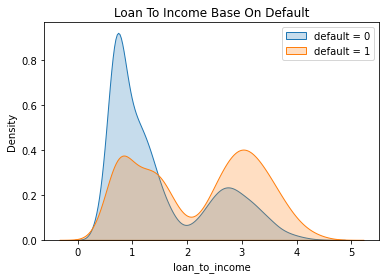

In [29]:
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], label = 'default = 0', fill=True)
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], label = 'default = 1', fill=True)
plt.title("Loan To Income Base On Default")
plt.legend()
plt.show()

In [30]:
### Calculate Delinquency Ratio

df_train_1['delinquency_ratio'] = round(df_train_1['delinquent_months'] * 100 /df_train_1['total_loan_months'], 2)
df_test['delinquency_ratio'] = round(df_test['delinquent_months'] * 100 /df_test['total_loan_months'], 2)
df_train_1['delinquency_ratio'].isna().sum()

np.int64(0)

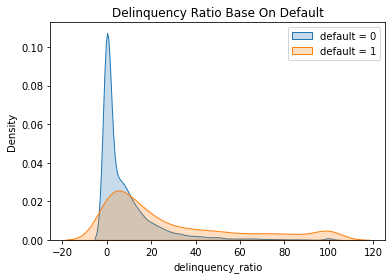

In [31]:
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], label = 'default = 0', fill=True)
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], label = 'default = 1', fill=True)
plt.title("Delinquency Ratio Base On Default")
plt.legend()
plt.show()

In [32]:
### Calculate  AVG DPD Delinquency

df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    df_train_1['total_dpd']/df_train_1['delinquent_months'],
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    df_test['total_dpd']/df_test['delinquent_months'],
    0
)

df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

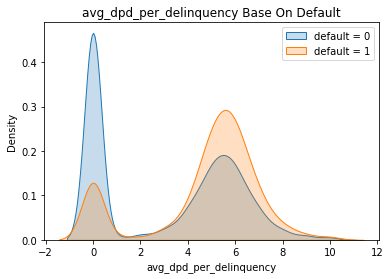

In [33]:
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], label = 'default = 0', fill=True)
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], label = 'default = 1', fill=True)
plt.title("avg_dpd_per_delinquency Base On Default")
plt.legend()
plt.show()

In [34]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [35]:
#### Droping some Feature

df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)
df_test = df_test.drop(['cust_id', 'loan_id'], axis=1)

In [36]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'total_loan_months', 'loan_amount', 'delinquent_months',
                'total_dpd', 'income'], axis=1)

df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'total_loan_months', 'loan_amount', 'delinquent_months',
                'total_dpd', 'income'], axis=1)

In [37]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

## Calculate VIF Of Numerical Feature

In [38]:
### Scaling Numeric Column MinMax

X_train = df_train_3.drop('default', axis=1)
y_train = df_train_3['default']


from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,"34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00","34,989.00"
mean,0.41,0.39,0.50,0.52,0.50,0.50,0.50,0.44,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.37,0.41,0.25,0.30,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.33,0.00,0.38,0.18,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.67,0.50,0.50,0.39,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,1.00,1.00,0.62,0.68,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [39]:
X_test = df_test.drop('default', axis=1)
y_test = df_test['default']


X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,"14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00","14,996.00"
mean,0.42,0.39,0.50,0.52,0.50,0.50,0.50,0.44,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.29,0.11,0.34
std,0.19,0.31,0.30,0.29,0.37,0.41,0.25,0.30,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.00,0.00,0.38,0.18,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.33,0.50,0.50,0.39,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.67,1.00,0.62,0.67,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00


In [40]:
#### Function to Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [
        variance_inflation_factor(data.values, i)
        for i in range(data.shape[1])
    ]
    return vif_df

In [41]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
35147,0.67,F,Married,Self-Employed,0.80,Owned,0.67,Mumbai,Maharashtra,0.49,...,0.00,0.00,0.00,0.00,0.38,0.01,0.00,0.20,0.05,0.60
15711,0.52,F,Single,Self-Employed,0.20,Owned,0.07,Mumbai,Maharashtra,0.49,...,0.15,0.16,0.16,0.16,0.36,0.28,0.08,0.63,1.00,0.55


In [42]:
calculate_vif(X_train[cols_to_scale])

/home/diguinafils/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.71
1,number_of_dependants,2.73
2,years_at_current_address,3.43
3,zipcode,3.79
4,number_of_open_accounts,4.39
5,number_of_closed_accounts,2.39
6,enquiry_count,6.40
7,credit_utilization_ratio,2.94
8,sanction_amount,101.79
9,processing_fee,inf


In [43]:
cols_to_drop = ['sanction_amount', 'principal_outstanding', 'processing_fee', 'gst', 'net_disbursement']

X_train_1 = X_train.drop(cols_to_drop, axis = 1)

In [44]:


numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns

numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_tenure_months',
       'bank_balance_at_application', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [45]:
calculate_vif(X_train_1[numeric_columns])

,Column,VIF
0,age,5.43
1,number_of_dependants,2.72
2,years_at_current_address,3.41
3,zipcode,3.77
4,number_of_open_accounts,4.35
5,number_of_closed_accounts,2.38
6,enquiry_count,6.37
7,credit_utilization_ratio,2.92
8,loan_tenure_months,6.04
9,bank_balance_at_application,1.81


In [46]:
numeric_columns.shape

(13,)

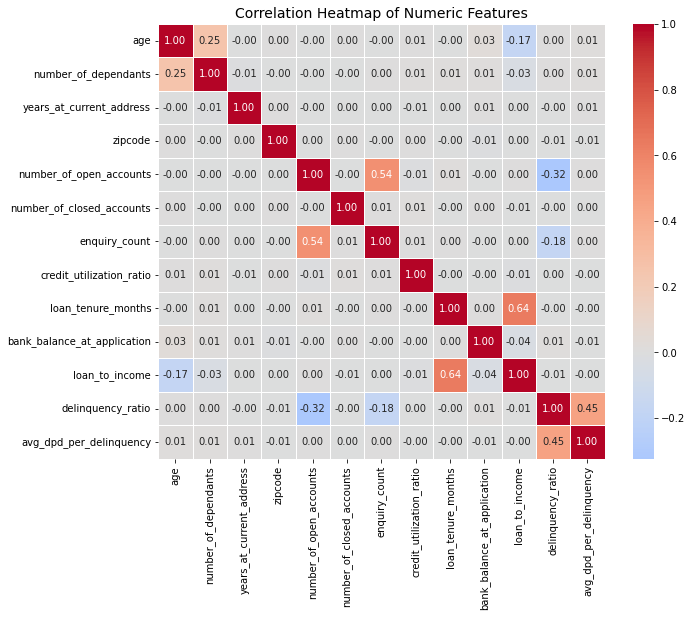

In [47]:
#### Correlation Calculation

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = X_train_1[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Draw the heatmap
sns.heatmap(
    corr, 
    annot=True,        # show correlation values
    fmt=".2f",         # format to 2 decimals
    cmap="coolwarm",   # color scheme
    center=0,          # center colormap at 0
    linewidths=0.5     # grid lines
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


## Feature Selection: Categorical Column

In [48]:
categorical_columns = X_train_1.select_dtypes(['object']).columns
categorical_columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type'],
      dtype='object')

In [49]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,6939,299,6640,0.10,0.21,-0.74,0.08
Education,5229,526,4703,0.17,0.15,0.17,0.00
Home,10558,1619,8939,0.54,0.28,0.66,0.17
Personal,12263,564,11699,0.19,0.37,-0.67,0.12


In [50]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34989 entries, 35147 to 25974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          34989 non-null  float64
 1   gender                       34989 non-null  object 
 2   marital_status               34989 non-null  object 
 3   employment_status            34989 non-null  object 
 4   number_of_dependants         34989 non-null  float64
 5   residence_type               34989 non-null  object 
 6   years_at_current_address     34989 non-null  float64
 7   city                         34989 non-null  object 
 8   state                        34989 non-null  object 
 9   zipcode                      34989 non-null  float64
 10  number_of_open_accounts      34989 non-null  float64
 11  number_of_closed_accounts    34989 non-null  float64
 12  enquiry_count                34989 non-null  float64
 13  credit_utilizatio

In [51]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.08294884382534698),
 'gender': np.float64(0.0005470689988456485),
 'marital_status': np.float64(0.0007768496647095973),
 'employment_status': np.float64(0.0032669182581258976),
 'number_of_dependants': np.float64(0.0016005163215862769),
 'residence_type': np.float64(0.2417445940608381),
 'years_at_current_address': np.float64(0.0023117519748565743),
 'city': np.float64(0.0014778156191917427),
 'state': np.float64(0.0014699447992313204),
 'zipcode': np.float64(0.0013405431436694618),
 'number_of_open_accounts': np.float64(0.08518737528620192),
 'number_of_closed_accounts': np.float64(0.001228781943864797),
 'enquiry_count': np.float64(0.007224441458625544),
 'credit_utilization_ratio': np.float64(2.3821032471610226),
 'loan_purpose': np.float64(0.3732283583836844),
 'loan_type': np.float64(0.16335184616454138),
 'loan_tenure_months': np.float64(0.21861995852234228),
 'bank_balance_at_application': np.float64(0.005691894568352511),
 'loan_to_income': np.float64(0.471

In [52]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
13,credit_utilization_ratio,2.382
19,delinquency_ratio,0.710
18,loan_to_income,0.472
20,avg_dpd_per_delinquency,0.406
14,loan_purpose,0.373
5,residence_type,0.242
16,loan_tenure_months,0.219
15,loan_type,0.163
10,number_of_open_accounts,0.085
0,age,0.083


In [4]:
selected_feature_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_feature_iv

NameError: name 'iv_values' is not defined

## Feature Encoding

In [54]:
X_train_reduced = X_train_1[selected_feature_iv]
X_test_reduced = X_test[selected_feature_iv]

X_train_reduced.head(3)

,age,residence_type,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
35147,0.673,Owned,1.000,0.475,Education,Secured,0.377,0.201,0.046,0.600
15711,0.519,Owned,0.000,0.970,Home,Secured,0.358,0.635,1.000,0.550
5304,0.365,Rented,1.000,0.131,Personal,Unsecured,0.189,0.016,0.000,0.000


In [55]:
col_to_encode = X_train_reduced.select_dtypes(['object']).columns
col_to_encode

Index(['residence_type', 'loan_purpose', 'loan_type'], dtype='object')

In [56]:
X_train_encoded = pd.get_dummies(X_train_reduced, columns=col_to_encode, dtype='int', drop_first=True)
X_train_encoded.head(1)

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
35147,0.673,1.000,0.475,0.377,0.201,0.046,0.600,1,0,1,0,0,0


In [57]:
X_test_encoded = pd.get_dummies(X_test_reduced, columns=col_to_encode, dtype='int', drop_first=True)
X_test_encoded.head(1)

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19401,0.385,0.333,0.051,0.264,0.098,0.122,0.433,1,0,0,0,1,1


<h1 align="center", style = "color:blue">Model Training</h1>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression()

lr_model.fit(X_train_encoded, y_train)

y_pred = lr_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13707
           1       0.84      0.72      0.77      1289

    accuracy                           0.96     14996
   macro avg       0.91      0.85      0.88     14996
weighted avg       0.96      0.96      0.96     14996



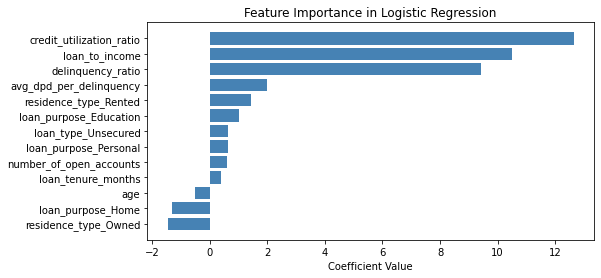

In [59]:
#### feature of importance


feature_importances = lr_model.coef_[0]
df_coef = pd.DataFrame(feature_importances, index = X_train_encoded.columns, columns=['Coefficient'] )

df_coef = df_coef.sort_values(by='Coefficient', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(df_coef.index, df_coef['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [60]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train_encoded, y_train)

y_pred = xgb_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13707
           1       0.80      0.75      0.78      1289

    accuracy                           0.96     14996
   macro avg       0.89      0.87      0.88     14996
weighted avg       0.96      0.96      0.96     14996



In [61]:
from sklearn.ensemble import RandomForestClassifier


rfc_model = RandomForestClassifier()

rfc_model.fit(X_train_encoded, y_train)

y_pred = rfc_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13707
           1       0.86      0.71      0.78      1289

    accuracy                           0.97     14996
   macro avg       0.92      0.85      0.88     14996
weighted avg       0.96      0.97      0.96     14996



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

### RandomizedSearch CV for Attempt 1: Logistic Regression

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, f1_score
import numpy as np

# Define hyperparameter grid
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg'],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'class_weight': [None, 'balanced']
}

# Create model
log_reg = LogisticRegression(max_iter=10000)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1  # <- important: avoid BrokenProcessPool errors
)

# Fit
random_search.fit(X_train_encoded, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=1438.44988828766, class_weight=balanced, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.23357214690901212, class_weight=None, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.23357214690901212, class_weight=None, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, solver=lbfgs, tol=0.1; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, solver=lbfgs, tol=0.1; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, solver=lbfgs, tol=0.1; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, solver=saga, tol=0

[CV] END C=0.0018329807108324356, class_weight=balanced, solver=saga, tol=0.01; total time=   0.1s
[CV] END C=0.0018329807108324356, class_weight=balanced, solver=saga, tol=0.01; total time=   0.1s
[CV] END C=206.913808111479, class_weight=balanced, solver=saga, tol=0.1; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, solver=saga, tol=0.1; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, solver=saga, tol=0.1; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, solver=lbfgs, tol=0.1; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, solver=lbfgs, tol=0.1; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, solver=lbfgs, tol=0.1; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, solver=liblinear, tol=0.1; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, solver=liblinear, tol=0.1; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, solver=liblinear, tol=0.1; to

### RandomizedSearch CV for Attempt 1: XGboost

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the model
xgb_model = XGBClassifier(eval_metric="logloss", use_label_encoder=False, n_jobs=-1)

# Parameter grid
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

# RandomizedSearchCV (set n_jobs=1 to avoid pickle errors)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring="f1_macro",  # better for imbalanced classes
    verbose=2,
    n_jobs=1,  # <- crucial fix
    random_state=42
)

# Fit
random_search.fit(X_train_encoded, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict
y_pred = best_xgb.predict(X_test_encoded)

# Classification report
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.4s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.4s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s


/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/diguinafils/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13707
           1       0.83      0.76      0.79      1289

    accuracy                           0.97     14996
   macro avg       0.90      0.87      0.89     14996
weighted avg       0.96      0.97      0.96     14996



In [64]:
y_train.value_counts()

default
0    31981
1     3008
Name: count, dtype: int64

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. handling of class imbalance

In [65]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)

y_train_rus.value_counts()

default
0    3008
1    3008
Name: count, dtype: int64

In [66]:
X_train_rus.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12970,0.385,0.000,0.838,0.679,0.571,0.000,0.000,1,0,0,1,0,0
44284,0.096,0.667,0.939,0.849,0.361,0.009,1.000,1,0,1,0,0,0
11255,0.538,0.667,0.848,0.642,0.426,0.014,0.750,0,0,0,1,0,0
16664,0.442,0.000,0.202,0.000,0.075,0.600,0.500,0,0,0,0,1,1
3731,0.250,1.000,0.818,0.943,0.258,0.000,0.000,1,0,1,0,0,0


In [67]:
model = LogisticRegression()

model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     13707
           1       0.51      0.96      0.67      1289

    accuracy                           0.92     14996
   macro avg       0.75      0.94      0.81     14996
weighted avg       0.95      0.92      0.93     14996



In [68]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     13707
           1       0.56      0.96      0.71      1289

    accuracy                           0.93     14996
   macro avg       0.78      0.95      0.84     14996
weighted avg       0.96      0.93      0.94     14996



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [69]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)

y_train_smt.value_counts()

default
0    31911
1    31911
Name: count, dtype: int64

In [70]:
model = LogisticRegression()

model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     13707
           1       0.56      0.95      0.70      1289

    accuracy                           0.93     14996
   macro avg       0.78      0.94      0.83     14996
weighted avg       0.96      0.93      0.94     14996



In [71]:
model = XGBClassifier(**random_search.best_params_)

model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13707
           1       0.68      0.89      0.77      1289

    accuracy                           0.95     14996
   macro avg       0.83      0.93      0.87     14996
weighted avg       0.96      0.95      0.96     14996



In [72]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [73]:
model = LogisticRegression()
scores = cross_val_score(model, X_train_smt, y_train_smt, cv=5,  scoring='f1')
print(scores.mean())

0.9477536645183262


In [ ]:
# Optional: reduce Optuna warning logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Objective function for Optuna
def objective(trial):
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga', 'newton-cg'])
    
    params = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),
        'solver': solver,
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'max_iter': 10000
    }
    
    model = LogisticRegression(**params)
    
    # Use CV with F1 macro scoring, disable parallelism
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=1)
    
    return np.mean(scores)

# Create and optimize study
study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50, show_progress_bar=False)

# Best hyperparameters
print("Best Parameters:", study_logistic.best_params)

# Train best model on full training data
best_model_logistic = LogisticRegression(**study_logistic.best_params, max_iter=10000)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on test data
y_pred = best_model_logistic.predict(X_test_encoded)
print("Classification Report:\n", classification_report(y_test, y_pred))

### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [ ]:
# Optional: reduce Optuna warning logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,  # suppress XGBoost warning
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**params)
    
    # Use CV with F1 macro scoring, n_jobs=1 to avoid pickle issues
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_encoded, y_train, cv=3, scoring=f1_scorer, n_jobs=1)
    
    return np.mean(scores)

# Create and optimize study
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50, show_progress_bar=False)

# Best hyperparameters
print("Best Parameters:", study_xgb.best_params)

# Train best model on full training data
best_xgb = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train_encoded, y_train)

# Evaluate on test data
y_pred = best_xgb.predict(X_test_encoded)
print("Classification Report:\n", classification_report(y_test, y_pred))

## Model Evaluation : ROC/AUC

In [ ]:
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)

print(report)

In [ ]:
from sklearn.metrics import roc_curve, auc

probalities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr, tpr, thresold = roc_curve(y_test, probalities)

area = auc(fpr, tpr)
print(area)

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [ ]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

In [ ]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

In [ ]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

In [ ]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

In [ ]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

In [ ]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

In [ ]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

In [ ]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

In [ ]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [ ]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

In [ ]:
final_model = best_model_logistic

coef = final_model.coef_[0]

df_coef = pd.DataFrame(coef, X_train_encoded.columns, columns=['Coefficient'])
df_coef = df_coef.sort_values(by='Coefficient', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(df_coef.index, df_coef['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [ ]:
X_test_encoded.head(2)

In [ ]:
X_test_encoded.columns

In [ ]:
cols_to_scale

In [ ]:
X_train_encoded.columns

In [ ]:
#from joblib import dump

#model_data = {
   # 'model': final_model,
    #'features': X_train_encoded.columns,
    #'cols_to_scale': cols_to_scale,
    #'scaler': scaler
#}

#dump(model_data, "artifacts/model_data.joblib")